In [1]:
# Write the requirements
!echo "" > requirements.txt
!echo "qiskit[all]~=2.0" >> requirements.txt
!echo "qiskit-ibm-runtime~=0.37" >> requirements.txt
!echo "qiskit-aer~=0.17" >> requirements.txt
!cat requirements.txt

# Install the notebook requirements
!pip install -q -r requirements.txt

import qiskit
import qiskit_ibm_runtime
import qiskit_aer

# Log package versions
print(f"qiskit version: {qiskit.__version__}")
print(f"qiskit-ibm-runtime version: {qiskit_ibm_runtime.__version__}")
print(f"qiskit-aer version: {qiskit_aer.__version__}")


qiskit[all]~=2.0
qiskit-ibm-runtime~=0.37
qiskit-aer~=0.17
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.5/69.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 8.9 MB/s eta

Before run this part:

1. Go to <https://quantum.ibm.com/> and copy the token
2. Open the secret tab here on colab on the left.
3. Create a new secret
4. Enable the access of the notebook to the secret

Name: QISKIT_IBM_TOKEN

Value: \<paste-your-token\>

In [2]:
try:
  from google.colab import userdata

  IN_COLAB = True

except:
  IN_COLAB = False


# if IN_COLAB:
#   token = userdata.get("QISKIT_IBM_TOKEN")
# else:
#   print("This notebook must be run on Colab")


from qiskit_ibm_runtime import QiskitRuntimeService


## Utility Functions

In [3]:
from math import pi
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, DensityMatrix
from qiskit.visualization import plot_histogram, plot_bloch_multivector, plot_bloch_vector


def probability_dict(qc):
    psi = Statevector(qc)
    proba =  DensityMatrix(psi).probabilities_dict()
    # add 0s if not present
    for i in range(2**len(qc.qubits)):
        # status is a str, with a number of digits equal to the number of qubits
        status = format(i, '0' + str(len(qc.qubits)) + 'b')
        if status not in proba:
            proba[status] = 0.
    return proba


def plot_probability(qc, title="", ax=None):
    legend = [title, ]

    counts = probability_dict(qc)

    plot_histogram(
      [counts, ],
      legend=legend,
      color=['crimson',],
      title=title
    )

    # Bigger labels
    hist = plot_histogram(counts, sort='hamming', ax=ax, target_string='1')

    return hist

def plot_bloch(qc, title="", ax=None):
    psi = Statevector(qc)
    if False: # len(qc.qubits) == 1:
        return plot_bloch_vector(psi, title=title, figsize=(6, 6), ax=ax)
    else:
        return plot_bloch_multivector(psi, title=title, figsize=(6, 6))

## The Algorithm


### Example 1: work on a two-quibit circuit



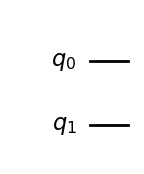

In [4]:
# Create a Bell state for demonstration
qc = QuantumCircuit(2)
qc.draw('mpl')

In [5]:
psi = Statevector(qc)
psi.draw("latex")

<IPython.core.display.Latex object>

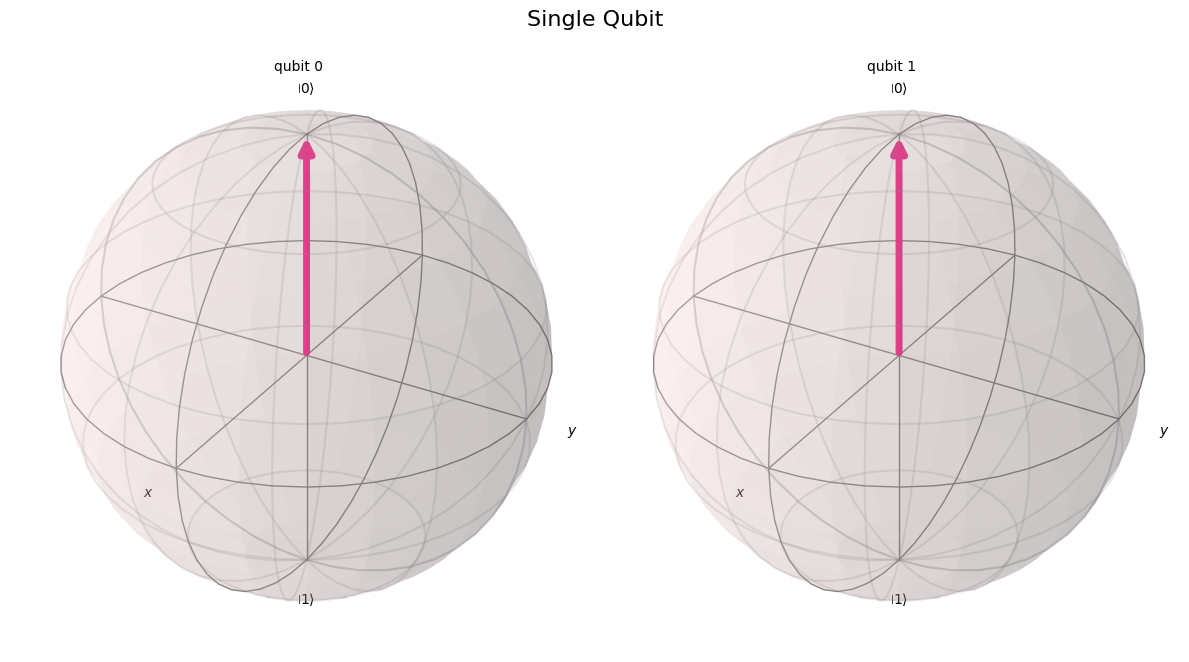

In [6]:

qc_bloch = plot_bloch(qc, title="Single Qubit")
qc_proba = plot_histogram(probability_dict(qc), title="Single Qubit")
# plot both in two columns
import matplotlib.pyplot as plt
qc_bloch

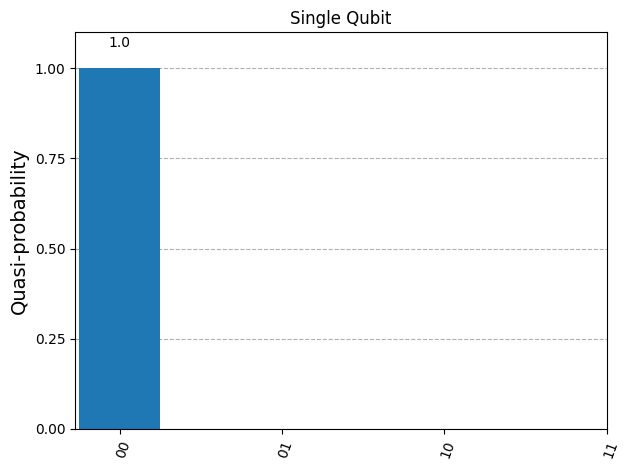

In [7]:
qc_proba

In [8]:
psi = Statevector(qc)
psi.draw('latex')

<IPython.core.display.Latex object>

## Exercise 2.1 - Build the |01⟩ State

Prepare a two-qubit system in the classical state:

$$
|01⟩ = |0⟩ \otimes |1⟩
$$

Steps:

1.	Create a quantum circuit with 2 qubits.
2.	Apply an X gate to qubit 1:

Display the Block spheres, and probability histogram.

## Exercise 2.2 - Create a Bell State (Entangled State)

Prepare the following entangled state:

$$
|\phi^+⟩ = \frac{|00⟩ + |11⟩}{\sqrt{2}}
$$


Steps:

1.	Create a quantum circuit with 2 qubits.

2.	Apply a Hadamard gate to qubit 0:

  `qc.h(0)`

3.	Apply a CNOT gate with:

	-	Control: qubit 0
	-	Target: qubit 1

  `qc.cx(0, 1)`

  This means:

	-	If qubit 0 is in |1⟩, flip qubit 1.
	-	If qubit 0 is in |0⟩, do nothing to qubit 1.

## Exercise 2.3 - GHZ State

Let us start implementing a [GHZ State](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) in N qubits. Here an example with N=3:

![](https://upload.wikimedia.org/wikipedia/en/5/57/The_quantum_logic_gates_that_generates_the_3-qubit_GHZ_state.png?20191230194117)
